Let us consider a 1DOF spring-mass-damper system. An input is a force $f$ and an output is a position of the cart $x$.

$$
m\ddot{x} = -c\dot{x} -kx + f
$$
To this equation, we execute Laplace transformation for both wing. Then we get:
$$
(ms^2 + cs + k)X = F
$$
Therefore, a transfrer function of this system is:
$$
G = \frac{1}{ms^2 + cs + k}
$$

In [ ]:
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt

m = 2
k = 0.1
c = 0.01

# Plant
G = tf([1], [m, c, k])
print(G)

The transfer function of this system is stable in itself. We can easily examine this, because a system is stable when all the real part of poles of G's denominator are negative value. (i.e. $Re[p_i]<0$).
In today's case,
$$
ms^2 + cs + k = 0 \quad \\\\
s^2 + 2\zeta\omega s + \omega^2 = 0 \quad \\\\
p = -\zeta\omega \pm j\omega\sqrt{1-\zeta^2} \quad \\\\
$$
Clearly, $Re[p_1] < 0 \quad Re[p_2]<0$

What if we want to keep the position of the cart $x$ at the certain value? Then we just need to control the input force $f$. To realize this, we introduce PID control. "PID" refers to "Proportional, Integral, Differential." This control method basically realizes the output that converges to intended one by reducing error $e(t) = x_d - x$. <img src = "PIDcontrol.png"> Let us implement this controller by using Python.

In [2]:
# Controller
Kp = 0.4
Ki = 0.4
Kd = 9
num = [Kd, Kp, Ki]
den = [1, 0]
K = tf(num, den)
print(K)


9 s^2 + 0.4 s + 0.4
-------------------
         s



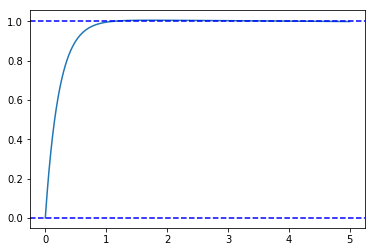

In [4]:
sys = feedback(K*G, 1)
t = np.linspace(0, 5, 1000)
y, T = step(sys, t)
plt.plot(T, y)
plt.axhline(0, color='b', linestyle='--')
plt.axhline(1, color='b', linestyle='--')
plt.show()